In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem import AllChem

import networkx as nx

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

graph_style = {
    "node_size": 300,
    "width": 2,
    "with_labels": False,
    "font_weight": "bold",
    "font_size": 10,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
}

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
def read_data(file_path):
    if file_path.endswith(".parquet"):
        return pd.read_parquet(file_path)
    elif file_path.endswith(".csv"):
        return pd.read_csv(file_path)
    else:
        raise ValueError(f"Unsupported file format for {file_path}")

In [4]:
de_train_path = "datasets/de_train.parquet"
adata_train_path = "datasets/adata_train.parquet"
id_map_path = "datasets/id_map.csv"
sample_submission_path = "datasets/sample_submission.csv"

de_train_data = read_data(de_train_path)
adata_train_data = read_data(adata_train_path)
id_map_data = read_data(id_map_path)
sample_submission_data = read_data(sample_submission_path)

In [5]:
de_train_data

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [6]:
id_map_data.head()

,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867


In [7]:
cell_type = de_train_data["cell_type"].unique()

In [8]:
cell_type

array(['NK cells', 'T cells CD4+', 'T cells CD8+', 'T regulatory cells',
       'B cells', 'Myeloid cells'], dtype=object)

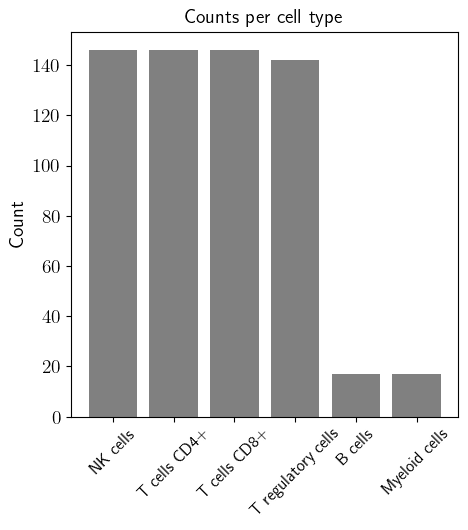

In [9]:
# Plot counts per cell type
plt.figure(figsize=(5, 5))
plt.bar(cell_type, de_train_data["cell_type"].value_counts(), color="grey")
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Count")
plt.title("Counts per cell type")
plt.show()

In [10]:
smiles = de_train_data["SMILES"].unique()

In [11]:
def mol_to_graph(mol):
    # Number of atoms and bonds
    num_atoms = mol.GetNumAtoms()
    num_bonds = mol.GetNumBonds()
    # For nodes
    nodes = []
    for i in range(num_atoms):
        atom = mol.GetAtomWithIdx(i)
        nodes.append(atom.GetSymbol())
    # For edges
    edges = []
    for i in range(num_bonds):
        bond = mol.GetBondWithIdx(i)
        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        edges.append((start, end))
    return nodes, edges

In [12]:
id = 143
mol = Chem.MolFromSmiles(smiles[id])

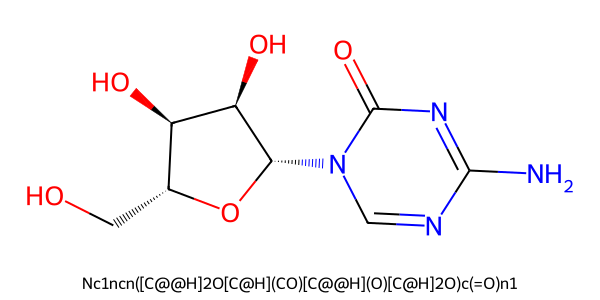

In [13]:
Draw.MolToImage(mol, size=(600, 300), kekulize=True, wedgeBonds=True, fitImage=True, options=None, canvas=None, legend=smiles[id])

In [14]:
nodes, edges = mol_to_graph(mol)

In [15]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

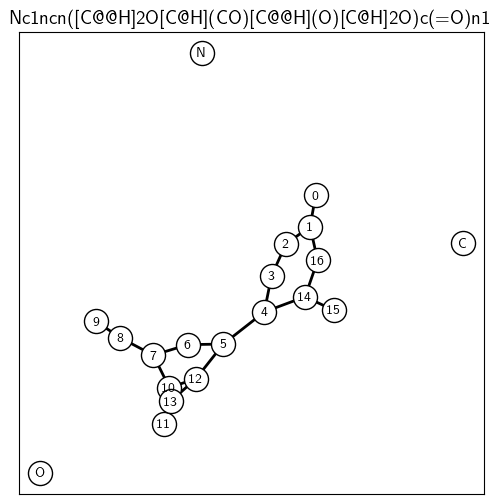

In [16]:
plt.figure(figsize=(6, 6))
# layout = nx.shell_layout(G)
# layout = nx.random_layout(G)
layout = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos=layout, **graph_style)
nx.draw_networkx_labels(G, pos=layout, font_size=10)
plt.title(smiles[id], fontsize=14)
plt.axis("on")
plt.show()

In [17]:
"""
Molecular Fingerprints: These are binary or count vectors which represent the presence (or count) of particular substructures or patterns in the molecule. ECFP (Extended Connectivity Fingerprints) and MACCS keys are popular choices. RDKit and Open Babel are great tools for this.
"""
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # 2 is the radius of the fingerprint
fp_arr = list(map(int, fp.ToBitString()))  # Convert fingerprint to a list of integers

# Generating MACCS keys
maccs_keys = AllChem.GetMACCSKeysFingerprint(mol)
maccs_arr = list(map(int, maccs_keys.ToBitString()))

print(f"ECFP Fingerprint: {fp_arr}")
print(f"MACCS Keys: {maccs_arr}")

ECFP Fingerprint: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

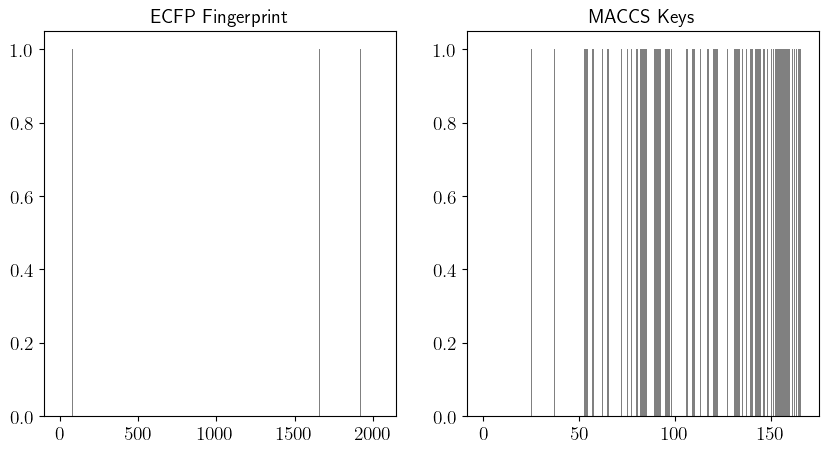

In [18]:
# Plotting the fingerprint
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(range(len(fp_arr)), fp_arr, color="grey")
ax[0].set_title("ECFP Fingerprint")
ax[1].bar(range(len(maccs_arr)), maccs_arr, color="grey")
ax[1].set_title("MACCS Keys")
plt.show()

In [21]:
adata_train_data

,obs_id,gene,count,normalized_count
0,000006a87ba75b72,AATF,1,5.567933
1,000006a87ba75b72,ABHD12,1,5.567933
2,000006a87ba75b72,ABHD3,1,5.567933
3,000006a87ba75b72,AC004687.1,1,5.567933
4,000006a87ba75b72,AC009779.2,1,5.567933
...,...,...,...,...
416442307,ffffe67500d95d8d,ZSWIM7,1,4.205181
416442308,ffffe67500d95d8d,ZSWIM8,1,4.205181
416442309,ffffe67500d95d8d,ZUP1,1,4.205181
416442310,ffffe67500d95d8d,ZXDB,1,4.205181


In [ ]:
adata_train_data.shape